# Python for Machine Learning
Softbank Robotics Europe

This code is divided in two parts: 
    * one scikit-learn example from the official documentation
    * the workshop to complete
Your work will be evaluated by lauching the whole script. 

Little reminder: it is good to comment your code, but not too much ;) 
    


## Scikit Learn Package Example

Code taken from:
    http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


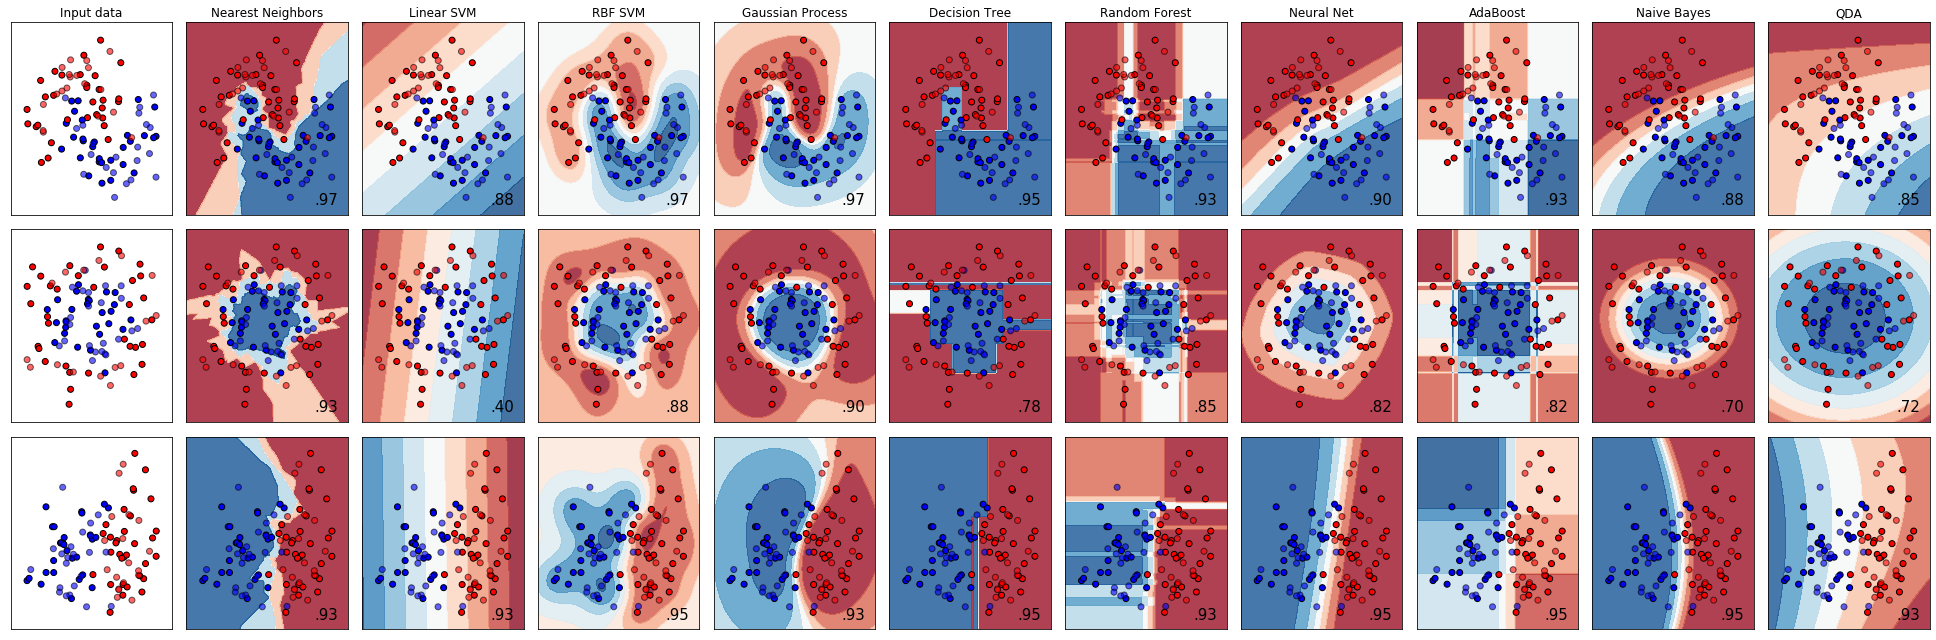

In [10]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Workshop
You will need to "import" the necessary packages to complete your work (in addition to the packages already imported in the example).

### Step 0: import the packages:

In [0]:
import pickle
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
from sklearn.metrics import confusion_matrix, f1_score

### Step 1.1: import data
You will find the pickle file at the address: [data.pickle](https://gitlab.com/susisanchezr/tp_python_sbre/raw/master/data.pickle). This file contains a python dictionary with the following variables:
* X_train
* Y_train
* X_test
* Y_test

You will train the models on the training dataset and the evaluation on the test dataset...

There is one example per line, where X contains the corresponding vectors of the data and Y the labels.

In [0]:
with open('data.pickle', 'rb') as file:
  data = pickle.load(file)
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']

In [0]:
X_train.shape

(670, 30)

In [0]:
Y_test.shape

(330,)

In [0]:
set(Y_train)

{0, 1, 2}

In [0]:
pd.DataFrame(X_train).head()

0         1         2   ...        27        28        29
0 -6.264618  3.398739  2.114328  ...  0.210716  0.294502  6.146488
1 -7.053777  1.511636 -0.690921  ... -1.694011 -1.557942  7.417529
2  2.050899  0.200728 -0.401277  ...  0.186438 -0.448274  2.029846
3 -8.991649 -0.354728  0.545162  ...  0.293973  0.294125  8.001711
4  1.280831  1.559239  1.082146  ... -0.044681  2.090870  1.642908

[5 rows x 30 columns]

### Step 1.2: data preprocessing
Use the PCA algorithm from scikit-learn to reduce the X vectors dimension to 3 features.

In [0]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)

In [0]:
X_train_pca.shape

(670, 3)

### Step 2: data visualization 
You can use the visualization package of your preference (matplotlib, pyplot, ....)

with a bit of color...

Text(0.5, 0.92, '3D visualization of training points after PCA')

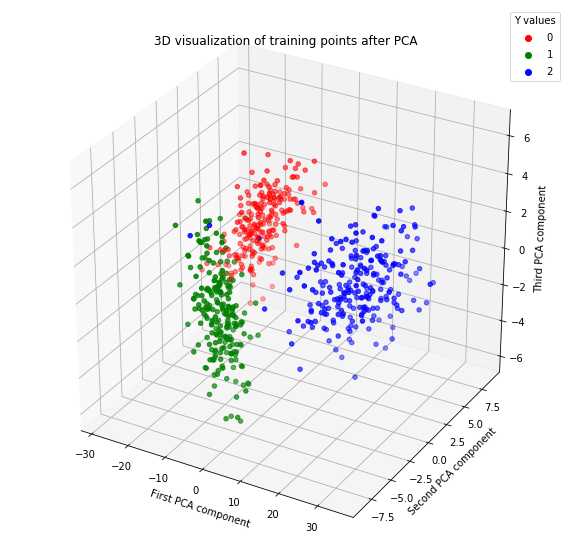

In [0]:
# We create a 3D visualization of the training data points with their Y labels in color
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red','green','blue']

x = X_train_pca[:,0]
y = X_train_pca[:,1]
z = X_train_pca[:,2]

scatter = ax.scatter(x, y, z, c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('First PCA component')
ax.set_ylabel('Second PCA component')
ax.set_zlabel('Third PCA component')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Y values")

ax.set_title('3D visualization of training points after PCA')

Given this visualization, We notice that that the different classes of our data point form distincts groups in the 3D space and are therefore linearly seperable.


### Step 3: unsupervised method
Apply **two** clustering methods of your preference (for example k-means and DBSCAN)

In [0]:
# we use kmean and agglomerative clustering and we fix 3 as the number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_train)

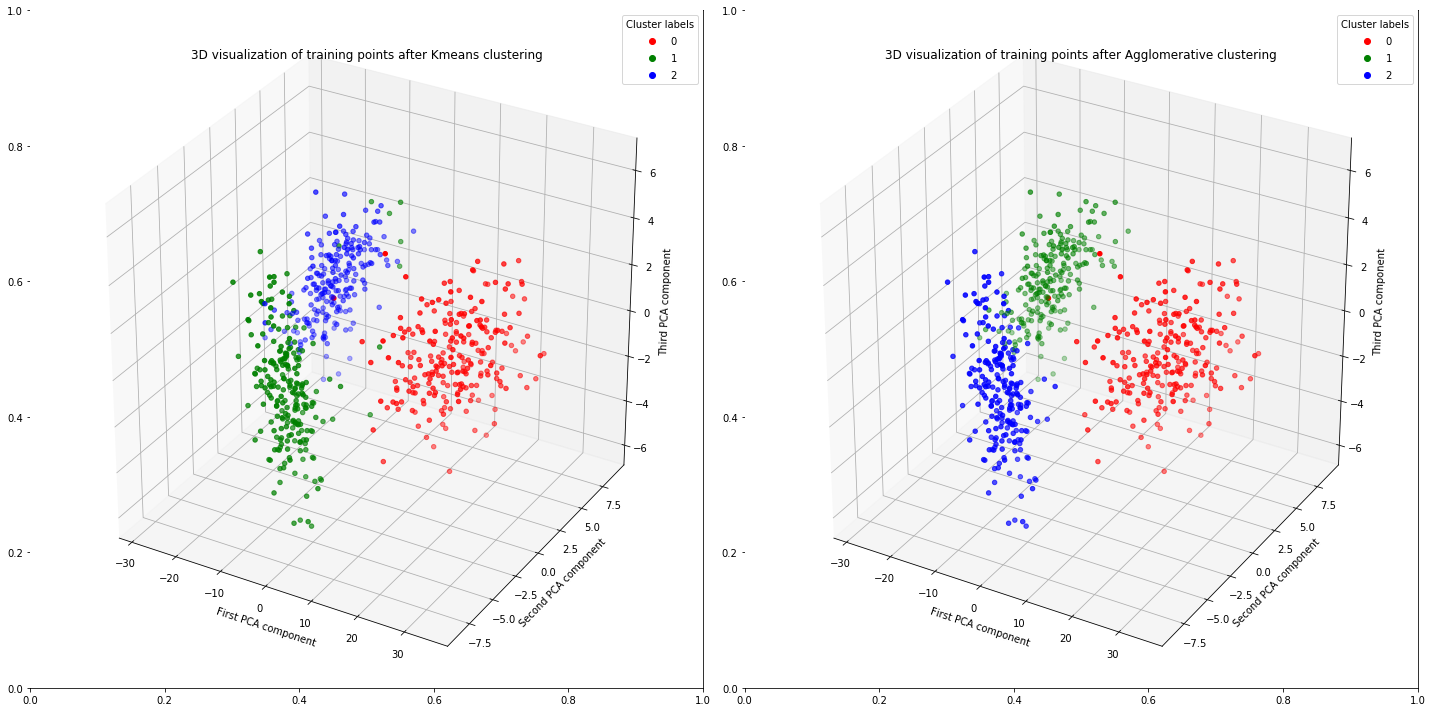

In [0]:
# We represent the result of the clustering algorithms
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax1 = fig.add_subplot(1,2,1, projection='3d')
colors = ['red','green','blue']

x = X_train_pca[:,0]
y = X_train_pca[:,1]
z = X_train_pca[:,2]

scatter1 = ax1.scatter(x, y, z, c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors))

ax1.set_xlabel('First PCA component')
ax1.set_ylabel('Second PCA component')
ax1.set_zlabel('Third PCA component')

legend1 = ax1.legend(*scatter1.legend_elements(),
                    loc="upper right", title="Cluster labels")

ax1.set_title('3D visualization of training points after Kmeans clustering')

ax2 = fig.add_subplot(1,2,2, projection='3d')

scatter2 = ax2.scatter(x, y, z, c=agg.labels_, cmap=matplotlib.colors.ListedColormap(colors))

ax2.set_xlabel('First PCA component')
ax2.set_ylabel('Second PCA component')
ax2.set_zlabel('Third PCA component')

legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="upper right", title="Cluster labels")

ax2.set_title('3D visualization of training points after Agglomerative clustering')

plt.tight_layout()

We notice the same shapes of clusters as seen in the figure above. Unsupervised learning with Kmeans and agglomerative clustering worked well to seperate the classes.

### Step 4: supervised method
Apply **two** supervised learning methods (one of them using [MLP](http://scikit-learn.org/stable/modules/neural_networks_supervised.html))

In [0]:
# Multi-layer perceptron classifier with stochastic gradient descent optimizer and learning rate = 0.2
mlp = MLPClassifier(solver='sgd', alpha=1e-2,
                     hidden_layer_sizes=(5, 3))

mlp.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
# We use the support vector machines classifier with linear kernel, (our data is linearly seperable)
svc = SVC(kernel = 'linear')

svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 5: evaluation
For each of the 4 methods used: evaluate the performance of the model on the test dataset with a metric of your preference.

In [0]:
# I choose the f1-metric to evaluate the classification performance after making the confusion matrix
def eval(model,  y_test, supervised=True):
  
  #in order to get the good kmeans clusters, I switched the labels 0 and 2  
  if supervised==False:
    y_test = 2 - y_test
  
  Y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, Y_pred)
  print('Confusion Matrix : ')
  print(cm)
  print('\nf1 score :')
  print(f1_score(y_test, Y_pred, average='macro'))

In [0]:
# Kmeans evaluation 
eval(kmeans, Y_test, supervised=False)

Confusion Matrix : 
[[ 97   4   0]
 [  0 113   1]
 [  2   4 109]]

f1 score :
0.9668636721828211


In [0]:
# There is no prediction option for the Agglomerative Clustering model, but given that it is unsupervised we could just 
#eval(agg, Y_test, supervised=False)

In [0]:
# Multi-Layer Perceptron
eval(mlp, Y_test)

Confusion Matrix : 
[[112   1   2]
 [  2 112   0]
 [  0   3  98]]

f1 score :
0.975734453484114


In [0]:
# SVM
eval(svc, Y_test)

Confusion Matrix : 
[[113   0   2]
 [  3 108   3]
 [  1   2  98]]

f1 score :
0.9664026530152291


The best method so far is the Multi-Layer Perceptron : 97.57 % score

### Step 6: open question 
By analyzing the characteristics of your PCA model, indicate how many dimensions are necessary to represent 75% of the training information. 

In [5]:
full_pca = PCA(n_components=30)

full_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# the explained variances quantify the importance of each principal component
# We look for the cumulative ratio of the amount of variance explained by each principal component
cumulative_variances = 100*np.cumsum(full_pca.explained_variance_ratio_)

In [33]:
cumulative_variances

array([ 81.98657745,  90.26565823,  92.13638159,  93.08625416,
        93.64366528,  94.17194123,  94.69332021,  95.17671671,
        95.64805404,  96.10512415,  96.55793841,  97.00189676,
        97.42425625,  97.83712803,  98.23614251,  98.63099085,
        99.00790499,  99.35020375,  99.67602003, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

Text(0.5, 1.0, 'Cumulative percentage of explained variances')

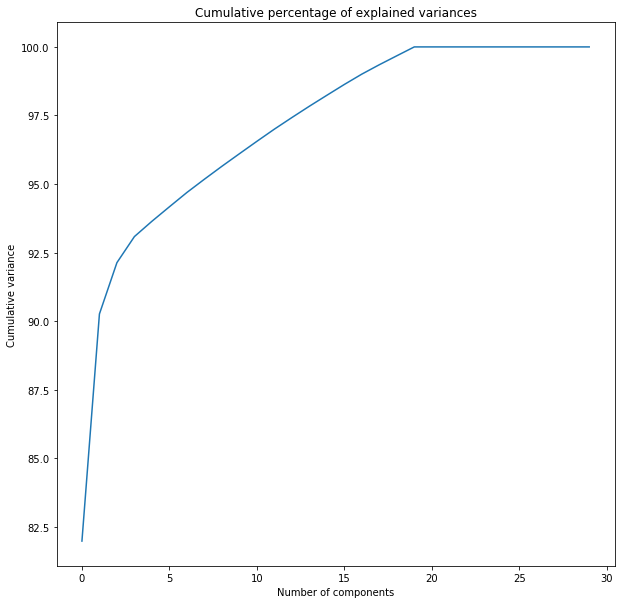

In [32]:
fig, ax = plt.subplots(1,1 , figsize=(10,10))
plt.plot(cumulative_variances)
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative variance')
ax.set_title('Cumulative percentage of explained variances')

The first principal component is enough to represent more than 80% of the training information

### Step 7: optional question
Propose a code using the flask package that serves a web page displaying your name and a link that points at [http://scikit-learn.org](http://scikit-learn.org) and opens a figure of your preference.

### Step 8: submission
Send your python script or your notebook at: [marine.chamoux@softbankrobotics.com](mailto:marine.chamoux@softbankrobotics.com)